12.4a

0.02 2
0.02 3
0.02 4
0.02 5
0.02 6
0.022413793103448276 2
0.022413793103448276 3
0.022413793103448276 4
0.022413793103448276 5
0.022413793103448276 6
0.02482758620689655 2
0.02482758620689655 3
0.02482758620689655 4
0.02482758620689655 5
0.02724137931034483 2
0.02724137931034483 3
0.02724137931034483 4
0.02724137931034483 5
0.029655172413793104 2
0.029655172413793104 3
0.029655172413793104 4
0.029655172413793104 5
0.03206896551724138 2
0.03206896551724138 3
0.03206896551724138 4
0.03206896551724138 5
0.034482758620689655 2
0.034482758620689655 3
0.034482758620689655 4
0.034482758620689655 5
0.03689655172413793 2
0.03689655172413793 3
0.03689655172413793 4
0.03689655172413793 5
0.039310344827586205 2
0.039310344827586205 3
0.039310344827586205 4
0.039310344827586205 5
0.04172413793103448 2
0.04172413793103448 3
0.04172413793103448 4
0.04172413793103448 5
0.044137931034482755 2
0.044137931034482755 3
0.044137931034482755 4
0.04655172413793103 2
0.04655172413793103 3
0.04655172413793103 4

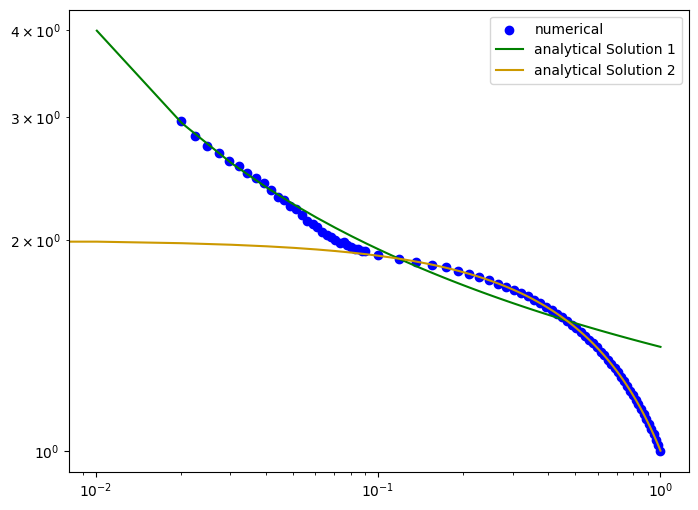

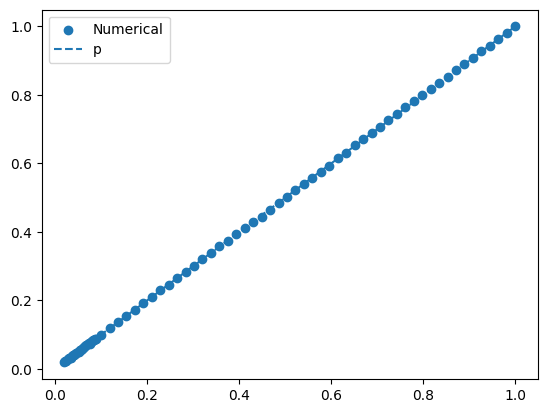

In [90]:
import numpy as np
from matplotlib import pyplot as plt
import random
import matplotlib.ticker as ticker


n=500
p_list1= np.linspace(0.02,0.09,30)
p_list2= np.linspace(0.1, 1, 50)

p_list = np.concatenate((p_list1, p_list2))

# p_list=[0.05,0.5,0.6]
def compute_average_path_l (a):
    length =0
    for i in range(n):
        for j in range(n):
            if i!=j:
                length+= a[i][j]
    length= length/(n**2-n)
    return length

# def analyticalvalue_1(n,p):
#     gamma = 0.57722
#     numerator = np.log(n)-gamma
#     denominator = np.log(p*(n-1))
#     l = (numerator/denominator)+0.5
#     return l

def analyticalvalue_1(n, p):
    gamma = 0.57722
    numerator = np.log(n) - gamma
    
    denominator = np.log(p * (n - 1)) if p * (n - 1) > 0 else np.nan
    
    l = (numerator / denominator) + 0.5
    return l

def analyticalvalue_2(p):
    return 2-p

def check_for_off_diagonal_terms1(a):
    n = len(a)  # Assuming 'n' is defined somewhere before this function is called
    for i in range(n):
        for j in range(n):
            if i != j and a[i][j] == -1:
                return True  # Return True if any off-diagonal element is -1
    return False
# def calcualte_c_coeff(a):
#     a_square = np.matmul(a,a)
#     a_cube = np.matmul(a_square,a)

#     diagonal_sum =0
#     for i in range(n):
#         diagonal_sum+=a[i,i]
    
#     k_i = np.sum(a, axis=0)
#     k_i_square = np.square(k_i)
#     diff = k_i_square-k_i
#     deno = np.sum(diff)

#     return diagonal_sum/deno

def calculate_clustering_coefficient(adjacency_matrix):
    n = len(adjacency_matrix)

    a_cube = np.matmul(np.matmul(adjacency_matrix, adjacency_matrix), adjacency_matrix)
    closed_triangles = np.trace(a_cube)

    degrees = np.sum(adjacency_matrix, axis=0)

    all_triangles = np.sum(np.square(degrees) - degrees)

    clustering_coefficient = closed_triangles / all_triangles if all_triangles > 0 else 0.0

    return clustering_coefficient


average_length_list=[]
c_list=[]
for p in p_list:

    amatrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i>j:
                x= random.random()
                if x< p:
                    amatrix[i][j]= 1
                    amatrix[j][i]=1
    degree= np.zeros((n,1))
    c_list.append(calculate_clustering_coefficient(amatrix))
    for i in range(n):
        degree[i,:] = np.sum(amatrix[i,:])

    l = np.full((n,n),-1)
    t=1               
    int_a = amatrix

    while check_for_off_diagonal_terms1(l):
        for i in range(n):
            for j in range(i+1,n):
                if amatrix[i,j]!=0:
                    if l[i,j]==l[j,i]==-1:
                        l[i,j]=t
                        l[j,i]=t

            
        amatrix=np.dot(amatrix,int_a)
        t+=1
        print(p, t)
    average_length_list.append(compute_average_path_l(l))
dark_yellow = (0.8, 0.6, 0)
print(average_length_list)
print(c_list)
p_ana= np.linspace(0,1,100)
analyticalvalue_1_list=[]
analyticalvalue_2_list=[]
for p in p_ana:
    analyticalvalue_1_list.append(analyticalvalue_1(n,p)) 
    analyticalvalue_2_list.append(analyticalvalue_2(p))

plt.figure(figsize=(8, 6)) 
plt.scatter(p_list, average_length_list, label='numerical', color='blue')
plt.loglog(p_ana,analyticalvalue_1_list, label='analytical Solution 1', color= 'green')
plt.loglog(p_ana, analyticalvalue_2_list, label= 'analytical Solution 2', color=dark_yellow)
plt.legend()
# plt.xlim(0.01, 1)
# plt.ylim(0.01,3.9)
plt.xlabel('p')
plt.ylabel('Average path length l')
plt.show()

plt.scatter(p_list,c_list, label='Numerical')
plt.plot(p_list, p_list, label='p', linestyle='dashed')
plt.legend()
plt.xlabel('p')
plt.ylabel('Clustering co efficient C')
plt.show()



C:\Users\purus\AppData\Local\Temp\ipykernel_31176\1160513118.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3.9)


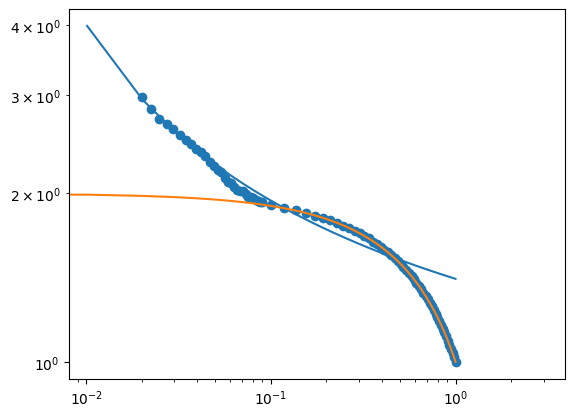

<Figure size 800x600 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt

# Your existing plot code
plt.scatter(p_list, average_length_list, label='numerical')
plt.loglog(p_ana, analyticalvalue_1_list, label='analyticalvalue_1')
plt.loglog(p_ana, analyticalvalue_2_list, label='analyticalvalue_2')
plt.xlim(0, 3.9)

# Adjust the size of the plot
plt.figure(figsize=(8, 6))  # You can adjust the width and height as needed

# Display the plot
plt.show()


12.4.b Clustering Co efficient